### Project: Customer Churn Prediction Model for banking

#### Objectives:
This project is aim to propose a model for predicting customer churn effectively in banking via data mining approach. 

Data mining is a process of discovering patterns and relationships in the data points using certain techniques from multiple disciplines. While conducting data mining, a few phases must be involved - problem formulation, data understanding, data pre-processing, data modelling and model evaluation.

Customer churn prediction belongs to classification model in data mining as it tries to categories whether a customer churn or not. Classification model is suitable in predicting categorical target variables. In order to propose an effective model, we are going to test on a few classification model and select the model with best performance.

**Dataset:** We will use the bank customer dataset from Kaggle in this report.

In [10]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Load the dataset as dataframe
df = pd.read_csv("/Users/yiqin/Documents/Study/Projects/Churn/Bank Customer Churn Prediction.csv")

In [12]:
# Preview the dataframe
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# Understand the data type of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


We can see that the dataset contains 8 columns with integer, 2 columns with float and 2 columns with object or string. The data type seems to be appropriate to the column values, hence no data transforming is required when doing data preparation. Also, there is no missing values in the dataset 

In [19]:
# Understand the data dimension
df.shape

(10000, 12)

We can see that the dataset contains 10,000 records with 12 columns.

#### Understanding the dataframe

For the customer churn prediction model, “churn” column is the target variable that we will use in the model as it is the indicator of whether a customer has churn or not.

In [22]:
# Check unique values of churn column
df.churn.unique()

array([1, 0])

The data type of “Churn” column is integer with only 1 and 0, with 1 is churn and 0 is not churn.

Next, we will check if there is any duplicated records in the dataset.

In [21]:
# Check if there's any duplicated records.
df[df.duplicated()]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


There is not duplicated records in the dataset after we run the code above.

In [23]:
# Check unique values of credit_card column
df.credit_card.unique()

array([1, 0])

In [24]:
# Check unique values of active_member column
df.active_member.unique()

array([1, 0])

#### Data Transformation

Next, we will be checking the basic statistics of the numerical columns to see an overview of the numbers for each columns and the level of skewness of the numerical columns to avoid misleading results from statistical tests. We will do some data transformation at this stage where necessary.

In [10]:
# Check basic statistics for numerical columns
print(df.describe())

        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

From the statistics, we can understand that credit_score is ranging from 350 to 850, with a mean of 650. We also have customer tenure range from 0 to 10 years. While for age, there are customers age from 18 to 92. Customers with 92 age seems to be an outlier and might skewed the data, we will further confirm this with the skewness check. Generally, the skewness for a normal distribution is near zero when round off.

In [31]:
# show skewness and kurtusis of a particular columns
print('-----------Skewness--------------')
print(df.skew())

-----------Skewness--------------
customer_id         0.001149
credit_score       -0.071607
age                -0.046406
tenure              0.010991
balance            -0.141109
products_number     0.745568
credit_card        -0.901812
active_member      -0.060437
estimated_salary    0.002085
churn               1.471611
dtype: float64


We can observe that age, product_numbers, credit_card, and churn attributes have a skewed distributions. The value in credit_card and churn attributes are 1 and 0, and serve as the indicator. Hence, we can ignore the skewness findings for these two attributes. However, for age and product_numbers, we will need to further explore and see if there is a need for data transformation. We will futher confirm this by plotting it into a histogram.

Text(0.5, 1.0, 'Age Distribution Before Transformation')

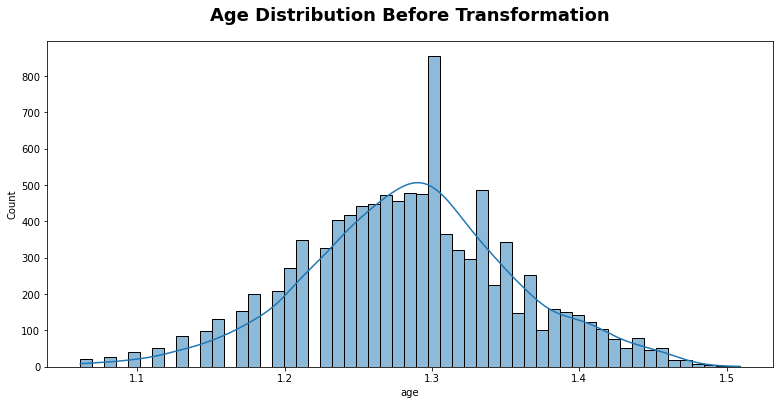

In [32]:
# Plotting histogram for age column
plt.figure(figsize=(13,6))
# plt.subplot(1,2,1)
sns.histplot(df.age, kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

From the histogram, we observe that age is highly right-skewed, which means that there is presence of positive outliers. As skewness can impact the performance of the algorithms negatively, we will overcome this by applying log normal transformation to achieve a normal distribution.

In [28]:
old_age = df.age

In [29]:
# Applying log to transform and overcome skewness
df.age = np.log(df.age)

We will then plot the comparison of the age distribution before and after the transformation. After applying log normal transformation, the age attribute has now achieved a normal distribution.

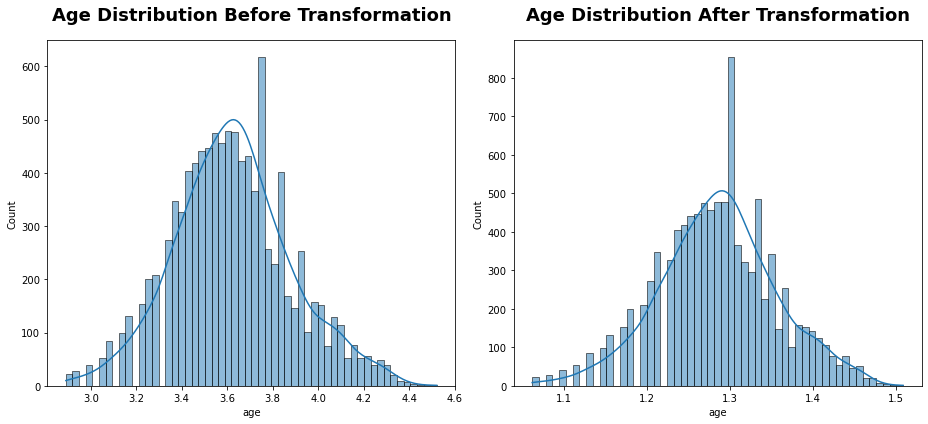

In [30]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df.age, kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

In [33]:
# product_count = df.products_number.value_counts()
# print(product_count)

Text(0.5, 1.0, 'Disribution of Number of products own by Customer')

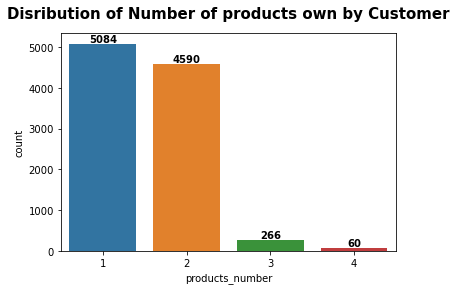

In [34]:
# Plotting barchart for products_number column
ax = sns.countplot(df.products_number)
ax.bar_label(ax.containers[0],fontweight="black",size=10)
plt.title("Disribution of Number of products own by Customer",fontweight="black",size=15,pad=15)

The Barchart shows that there are more customers with 1 to 2 products, compared to 3 and 4. We can reduce the skewness by grouping 3 to 4 into 1 group. However, we should keep 1 and 2 products as separate group from 3 to 4 as it could have very distinct meaning for using 1 product in banking compared to 2 products.

In [37]:
# Regrouping customers based on products_number
conditions =  [(df.products_number==1), (df.products_number==2), (df.products_number>2)]
values =     ["One product","Two Products","More Than 2 Products"]

In [38]:
df["products_group"] = np.select(conditions,values)

In [39]:
print(df["products_group"].value_counts())

One product             5084
Two Products            4590
More Than 2 Products     326
Name: products_group, dtype: int64


Text(0.5, 1.0, 'Disribution of Number of products own by Customer after grouping')

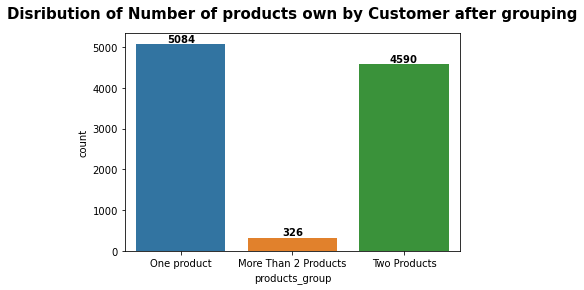

In [41]:
# Show the Barchart after regrouping.
ax = sns.countplot(df.products_group)
ax.bar_label(ax.containers[0],fontweight="black",size=10)
plt.title("Disribution of Number of products own by Customer after grouping",fontweight="black",size=15,pad=15)

### Start Modelling

There are a few common classification model that have been proven to successfully predict customer churn in banking industry. These models are Decision Tree, Random Forest and Artificial Neural Network (ANN). We will fit the dataset and test on these models to determine the best models for this datatset. In this project, we are splitting the training and test data into 80:20 proportion.

In [42]:
# import necessary libraries
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import roc_curve, roc_auc_score

In [44]:
# Identifying and labelling attributes
df_inputs = pd.get_dummies(df[['credit_score', 'country','gender', 'age', 'tenure', 'products_number', 'credit_card', 'active_member', 'estimated_salary']])
df_label = df['churn']

In [24]:
# Split dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(df_inputs, df_label, 
             stratify=df_label, test_size=0.2, random_state=42)

### Decision Tree

In [25]:
# Fit the train dataset into the Model
from sklearn.tree import DecisionTreeClassifier
min_sample = int(len(df) * 0.1) 
dtree = DecisionTreeClassifier(criterion = 'entropy', splitter="best", max_depth=5, 
            min_samples_leaf=5, min_samples_split=min_sample, random_state=1) 
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=1000, random_state=1)

In [26]:
#Predict the response for test dataset
y_predict_dt = dtree.predict(X_test)

In [27]:
# Using metrics' function parameters to derive performance measures
acc = metrics.accuracy_score(Y_test, y_predict_dt) 
sens = metrics.recall_score(Y_test, y_predict_dt,average='binary', pos_label=1) 
spec = metrics.recall_score(Y_test, y_predict_dt,average='binary', pos_label=0) 
prec = metrics.precision_score(Y_test, y_predict_dt,average='binary', pos_label=1) 
f1 = metrics.f1_score(Y_test, y_predict_dt,average='binary', pos_label=0) 


# display all the measures derived
print("Decision Tree Model")
print("Accuracy : ", round(acc,3)) 
print("Misclassification : ", round(1-acc,3)) 
print("Precision : ", round(prec,3)) 
print("Sensitivity/Recall 1: ", round(sens,3)) 
print("Specificity/Recall 0: ", round(spec,3)) 
print("F1-measure : ", round(f1,3))

Decision Tree Model
Accuracy :  0.839
Misclassification :  0.161
Precision :  0.851
Sensitivity/Recall 1:  0.253
Specificity/Recall 0:  0.989
F1-measure :  0.907


In [28]:
# derive ROC AUC scores of each model
auc_dt = roc_auc_score(Y_test, y_predict_dt)
print('AUC for DecisionTree: ', round(auc_dt,4))

AUC for DecisionTree:  0.6209


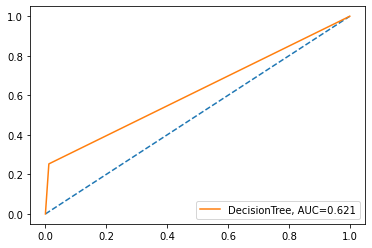

In [29]:
# initiate the plots of ROC charts for each model
plt.figure(0).clf()
plt.plot([0, 1], ls="--")

#fit DecisionTree model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_dt)
plt.plot(fpr,tpr,label="DecisionTree, AUC="+str(round(auc_dt,3)))
plt.legend(loc=4)

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_obj = RandomForestClassifier(n_estimators=200)

In [31]:
# Fit the train dataset into the Model
rf_obj.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(n_estimators=200)

In [32]:
#Predict the response for test dataset
y_predict_rf = rf_obj.predict(X_test)

In [33]:
# Using metrics' function parameters to derive performance measures
acc = metrics.accuracy_score(Y_test, y_predict_rf) 
sens = metrics.recall_score(Y_test, y_predict_rf,average='binary', pos_label=1) 
spec = metrics.recall_score(Y_test, y_predict_rf,average='binary', pos_label=0) 
prec = metrics.precision_score(Y_test, y_predict_rf,average='binary', pos_label=1) 
f1 = metrics.f1_score(Y_test, y_predict_rf,average='binary', pos_label=0) 


# display all the measures derived
print('Random Forest Model')
print("Accuracy : ", round(acc,3)) 
print("Misclassification : ", round(1-acc,3)) 
print("Precision : ", round(prec,3)) 
print("Sensitivity/Recall 1: ", round(sens,3)) 
print("Specificity/Recall 0: ", round(spec,3)) 
print("F1-measure : ", round(f1,3))

Random Forest Model
Accuracy :  0.848
Misclassification :  0.152
Precision :  0.697
Sensitivity/Recall 1:  0.447
Specificity/Recall 0:  0.95
F1-measure :  0.909


In [34]:
# derive ROC AUC scores of each model
auc_rf = roc_auc_score(Y_test, y_predict_rf)
print('AUC for RandomForest: ', round(auc_rf,4))

AUC for RandomForest:  0.6988


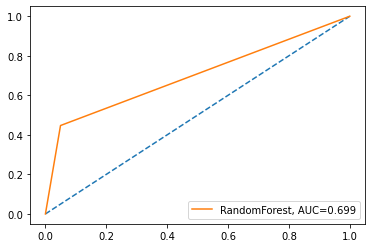

In [35]:
# initiate the plots of ROC charts for each model
plt.figure(0).clf()
plt.plot([0, 1], ls="--")

#fit RandomForest model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_rf)
plt.plot(fpr,tpr,label="RandomForest, AUC="+str(round(auc_rf,3)))
plt.legend(loc=4)

### ANN

In [36]:
# feature scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)                     #fit only on training data  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)       # apply same transformation to test data

from sklearn.neural_network import MLPClassifier 
nn = MLPClassifier(solver='lbfgs', alpha=1e-05 , activation = 'identity', random_state=1,
             hidden_layer_sizes=(200,6), learning_rate = 'adaptive', 
             learning_rate_init=0.0001, max_iter=500)

nn.fit(X_train, Y_train)

MLPClassifier(activation='identity', alpha=1e-05, hidden_layer_sizes=(200, 6),
              learning_rate='adaptive', learning_rate_init=0.0001, max_iter=500,
              random_state=1, solver='lbfgs')

In [37]:
#Predict the response for test dataset
y_predict_ann = nn.predict(X_test)

In [38]:
# Using metrics' function parameters to derive performance measures
acc = metrics.accuracy_score(Y_test, y_predict_ann) 
sens = metrics.recall_score(Y_test, y_predict_ann,average='binary', pos_label=1) 
spec = metrics.recall_score(Y_test, y_predict_ann,average='binary', pos_label=0) 
prec = metrics.precision_score(Y_test, y_predict_ann,average='binary', pos_label=1) 
f1 = metrics.f1_score(Y_test, y_predict_ann,average='binary', pos_label=0) 

# display all the measures derived
print("ANN Model")
print("Accuracy : ", round(acc,3)) 
print("Misclassification : ", round(1-acc,3)) 
print("Precision : ", round(prec,3)) 
print("Sensitivity/Recall 1: ", round(sens,3)) 
print("Specificity/Recall 0: ", round(spec,3)) 
print("F1-measure : ", round(f1,3))

ANN Model
Accuracy :  0.814
Misclassification :  0.186
Precision :  0.632
Sensitivity/Recall 1:  0.211
Specificity/Recall 0:  0.969
F1-measure :  0.893


In [39]:
# derive ROC AUC scores of each model
auc_ann = roc_auc_score(Y_test, y_predict_ann)
print('AUC for ANN: ', round(auc_ann,4))

AUC for ANN:  0.59


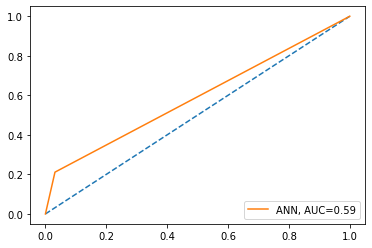

In [40]:
# initiate the plots of ROC charts for each model
plt.figure(0).clf()
plt.plot([0, 1], ls="--")

#fit ANN model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_ann)
plt.plot(fpr,tpr,label="ANN, AUC="+str(round(auc_ann,3)))
plt.legend(loc=4)

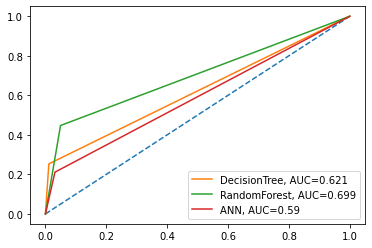

In [41]:
# initiate the plots of ROC charts for each model
plt.figure(0).clf()
plt.plot([0, 1], ls="--")

#fit DecisionTree model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_dt)
plt.plot(fpr,tpr,label="DecisionTree, AUC="+str(round(auc_dt,3)))
plt.legend(loc=4)

#fit RandomForest model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_rf)
plt.plot(fpr,tpr,label="RandomForest, AUC="+str(round(auc_rf,3)))
plt.legend(loc=4)

#fit ANN model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_ann)
plt.plot(fpr,tpr,label="ANN, AUC="+str(round(auc_ann,3)))
plt.legend(loc=4)

### Observation and Discussion

The objective of this project is to find the model that can predict customer churn effectively, hence the accuracy of the model is important. <br>
From the 3 models above, we can observe that Random Forest achieve the highest accuracy of 0.858 (85.8%). That means overall, Random Forest correctly predict 85.8% of the churn labels. Besides that, precision is also important in churn prediction as we want to be able to correctly predict the customers who actually churn. Decision Tree is the winner here with the highest precision of 0.855 (85.5%). Finally, we compare the F1 score of these three models. F1 score is the harmonic mean of the precision and recall. The higher F1 score, the better the model on predicting the dataset. Random Forest has the highest F1 score at 0.915 (91.5%) among all three models. The rule of thumb is the model should achieve at least 0.7 of F1 score. <br>

#### ROC & AUC
Receiver Operator Characteristics (ROC) curves and Area Under the Curves (AUC) are another two common metrics used to evaluate the performance of classification algorithms. ROC and AUC helps to cross check if the model only have high accuracy but low in recall and precision. A rule of thumb is to select the model that not only have a ROC curve closest to ideal, but also with AUC higher than 0.8. As observed above, all three models have quite poor ROC curve, but Random Forest is still the best out of three models. As for AUC value, all three models did not achieve the benchmark of 0.8, but Random Forest model performs the best and achieve an acceptable value of 0.711.

### Conclusion
Overall, the best model is Random Forest with the consideration of accuracy, F1 Score, ROC and AUC metrics. Random Forest is the best performing model among others, although AUC value is barely acceptable.